# Wind Power Prediction

Importing Libraries

In [71]:
import pandas as pd
import numpy as np
from pandas.io.formats.excel import ExcelFormatter
import openpyxl

Creating a dataframe

In [72]:
df = pd.read_csv("D:\Wind Prediction Project\Leap Green Five Year Data - Copy\Panapatty_.2018_scada_data.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,Latitude,10.886611,10.886611,10.886611,10.886611,10.842083,10.842083,10.842083,10.842083,10.843889,...,10.859389,10.859389,10.862222,10.862222,10.862222,10.862222,10.844028,10.844028,10.844028,10.844028
1,Longitude,77.123083,77.123083,77.123083,77.123083,77.140889,77.140889,77.140889,77.140889,77.163194,...,77.145611,77.145611,77.130139,77.130139,77.130139,77.130139,77.15625,77.15625,77.15625,77.15625
2,Mac No,M_1,M_1,M_1,M_1,M_2,M_2,M_2,M_2,M_3,...,M_17,M_17,M_18,M_18,M_18,M_18,M_19,M_19,M_19,M_19
3,Parameters,Wind Speed at 78.5 mtr,Wind Direction at 78.5 mtr,Ambient Temp at 78.5 mtr,Active_Power 78.5 mtr,Wind Speed at 78.5 mtr,Wind Direction at 78.5 mtr,Ambient Temp at 78.5 mtr,Active_Power 78.5 mtr,Wind Speed at 78.5 mtr,...,Ambient Temp at 78.5 mtr,Active_Power 78.5 mtr,Wind Speed at 78.5 mtr,Wind Direction at 78.5 mtr,Ambient Temp at 78.5 mtr,Active_Power 78.5 mtr,Wind Speed at 78.5 mtr,Wind Direction at 78.5 mtr,Ambient Temp at 78.5 mtr,Active_Power 78.5 mtr
4,Units,m/s,degree,°C,,m/s,degree,°C,,m/s,...,°C,,m/s,degree,°C,,m/s,degree,°C,


Transposing the data

In [73]:
df = df.set_index(0).T
df.rename(columns = {'Mac No':'Mac_No'}, inplace=True)
df.head()

,Latitude,Longitude,Mac_No,Parameters,Units,01-01-2018 00:00,01-01-2018 00:10,01-01-2018 00:20,01-01-2018 00:30,01-01-2018 00:40,...,31-12-2018 22:20,31-12-2018 22:30,31-12-2018 22:40,31-12-2018 22:50,31-12-2018 23:00,31-12-2018 23:10,31-12-2018 23:20,31-12-2018 23:30,31-12-2018 23:40,31-12-2018 23:50
1,10.886611,77.123083,M_1,Wind Speed at 78.5 mtr,m/s,3.7,3.7,3.4,2.4,1.7,...,5.6,6,5.7,5.9,6.1,7,7.4,6.7,6.5,6.1
2,10.886611,77.123083,M_1,Wind Direction at 78.5 mtr,degree,232.3,232.3,232.3,232.3,232.3,...,117.4,117.4,117.4,117.4,117.4,117.4,117.4,117.4,116.1,99.6
3,10.886611,77.123083,M_1,Ambient Temp at 78.5 mtr,°C,24,24,24,24,24,...,24,23.7,23,23,23,23,23,23,22.5,22
4,10.886611,77.123083,M_1,Active_Power 78.5 mtr,,-1,-1,-1,-0.7,0,...,311.3,361.3,336.4,354,396.8,567.7,620.1,517.7,424.2,372.8
5,10.842083,77.140889,M_2,Wind Speed at 78.5 mtr,m/s,3.3,3.7,3.6,2.9,3,...,7.6,7.4,6.7,7.5,7,7,7.2,7.2,7.1,7.8


Selecting Machine Number

In [74]:
#Mac_No_12 = df[df["Mac_No"].str.contains('M_12')]
#Mac_No_12.head(5)

Transposing the Parameters

In [75]:
df=(df.melt(id_vars=['Latitude','Longitude','Mac_No','Parameters', 'Units'],var_name='Date',value_name='Value').set_index('Date'))
df = df.drop('Units', axis=1)
df.head(8)

,Latitude,Longitude,Mac_No,Parameters,Value
Date,,,,,
01-01-2018 00:00,10.886611,77.123083,M_1,Wind Speed at 78.5 mtr,3.7
01-01-2018 00:00,10.886611,77.123083,M_1,Wind Direction at 78.5 mtr,232.3
01-01-2018 00:00,10.886611,77.123083,M_1,Ambient Temp at 78.5 mtr,24
01-01-2018 00:00,10.886611,77.123083,M_1,Active_Power 78.5 mtr,-1
01-01-2018 00:00,10.842083,77.140889,M_2,Wind Speed at 78.5 mtr,3.3
01-01-2018 00:00,10.842083,77.140889,M_2,Wind Direction at 78.5 mtr,232.3
01-01-2018 00:00,10.842083,77.140889,M_2,Ambient Temp at 78.5 mtr,23
01-01-2018 00:00,10.842083,77.140889,M_2,Active_Power 78.5 mtr,8.5


Renaming the Parameters

In [76]:
df['Parameters'] = df['Parameters'].apply(lambda x: x.replace(' at 78.5 mtr',''))
df['Parameters'] = df['Parameters'].apply(lambda x: x.replace(' 78.5 mtr',''))
df = df.reset_index()
df.head(5)

,Date,Latitude,Longitude,Mac_No,Parameters,Value
0,01-01-2018 00:00,10.886611,77.123083,M_1,Wind Speed,3.7
1,01-01-2018 00:00,10.886611,77.123083,M_1,Wind Direction,232.3
2,01-01-2018 00:00,10.886611,77.123083,M_1,Ambient Temp,24
3,01-01-2018 00:00,10.886611,77.123083,M_1,Active_Power,-1
4,01-01-2018 00:00,10.842083,77.140889,M_2,Wind Speed,3.3


Transposing the Parameters again

In [77]:
df = (df.pivot(index =['Date','Latitude','Longitude','Mac_No'],columns='Parameters').stack(0).reset_index())
df = df.drop('level_4', axis=1)
df

Parameters,Date,Latitude,Longitude,Mac_No,Active_Power,Ambient Temp,Wind Direction,Wind Speed
0,01-01-2018 00:00,10.842083,77.140889,M_2,8.5,23,232.3,3.3
1,01-01-2018 00:00,10.843889,77.163194,M_3,77.1,24,237.4,3.9
2,01-01-2018 00:00,10.844028,77.15625,M_19,-0.1,24,171.1,4
3,01-01-2018 00:00,10.844917,77.132111,M_6,-2.1,24,242.6,3.6
4,01-01-2018 00:00,10.845861,77.139528,M_10,21.9,23,236.2,4.1
...,...,...,...,...,...,...,...,...
998635,31-12-2018 23:50,10.8605,77.122861,M_7,438.3,22,100.9,6.6
998636,31-12-2018 23:50,10.86075,77.117194,M_8,337.6,22,84.3,6
998637,31-12-2018 23:50,10.862222,77.130139,M_18,404.3,23,111.1,6.2
998638,31-12-2018 23:50,10.865806,77.116444,M_9,672.5,22,100.9,7.7


Getting info of the data

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998640 entries, 0 to 998639
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Date             998640 non-null  object
 1   Latitude         998640 non-null  object
 2   Longitude        998640 non-null  object
 3   Mac_No           998640 non-null  object
 4    Active_Power    998640 non-null  object
 5    Ambient Temp    998640 non-null  object
 6    Wind Direction  998640 non-null  object
 7    Wind Speed      998640 non-null  object
dtypes: object(8)
memory usage: 61.0+ MB


Renaming the Parameters for easy use 

In [79]:
df.rename(columns={' Active_Power': 'Active_Power', 
                     ' Ambient Temp': 'Ambient_Temp',
                     ' Wind Direction': 'Wind_Direction', 
                     ' Wind Speed': 'Wind_Speed'}, 
            inplace=True)
df

Parameters,Date,Latitude,Longitude,Mac_No,Active_Power,Ambient_Temp,Wind_Direction,Wind_Speed
0,01-01-2018 00:00,10.842083,77.140889,M_2,8.5,23,232.3,3.3
1,01-01-2018 00:00,10.843889,77.163194,M_3,77.1,24,237.4,3.9
2,01-01-2018 00:00,10.844028,77.15625,M_19,-0.1,24,171.1,4
3,01-01-2018 00:00,10.844917,77.132111,M_6,-2.1,24,242.6,3.6
4,01-01-2018 00:00,10.845861,77.139528,M_10,21.9,23,236.2,4.1
...,...,...,...,...,...,...,...,...
998635,31-12-2018 23:50,10.8605,77.122861,M_7,438.3,22,100.9,6.6
998636,31-12-2018 23:50,10.86075,77.117194,M_8,337.6,22,84.3,6
998637,31-12-2018 23:50,10.862222,77.130139,M_18,404.3,23,111.1,6.2
998638,31-12-2018 23:50,10.865806,77.116444,M_9,672.5,22,100.9,7.7


Changing the datatype from Object to Float

In [80]:
#out2['Latitude'] = out2['Latitude'].astype(object)
#out2['Longitude'] = out2['Longitude'].astype(object)
"""
out2['Latitude'] = pd.to_numeric(out2['Latitude'],errors = 'coerce')
out2['Longitude'] = pd.to_numeric(out2['Longitude'],errors = 'coerce')
"""

df['Active_Power'] = pd.to_numeric(df['Active_Power'],errors = 'coerce')
df['Ambient_Temp'] = pd.to_numeric(df['Ambient_Temp'],errors = 'coerce')
df['Wind_Direction'] = pd.to_numeric(df['Wind_Direction'],errors = 'coerce')
df['Wind_Speed'] = pd.to_numeric(df['Wind_Speed'],errors = 'coerce')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998640 entries, 0 to 998639
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            998640 non-null  object 
 1   Latitude        998640 non-null  object 
 2   Longitude       998640 non-null  object 
 3   Mac_No          998640 non-null  object 
 4   Active_Power    942387 non-null  float64
 5   Ambient_Temp    942387 non-null  float64
 6   Wind_Direction  942387 non-null  float64
 7   Wind_Speed      942387 non-null  float64
dtypes: float64(4), object(4)
memory usage: 61.0+ MB


In [82]:
df.describe()

Parameters,Active_Power,Ambient_Temp,Wind_Direction,Wind_Speed
count,942387.000000,942387.000000,942387.000000,942387.000000
mean,392.987223,27.367804,157.244187,5.898165
std,492.075444,4.219871,93.704954,3.247384
min,-29.400000,0.000000,0.000000,0.000000
25%,-0.200000,24.000000,80.400000,3.400000
50%,138.000000,26.200000,131.500000,5.100000
75%,733.300000,29.300000,242.600000,8.400000
max,1512.700000,50.000000,360.000000,18.900000


In [83]:
count_negative_values = (df['Active_Power'] < 0).sum()
count_positive_values = (df['Active_Power'] > 0).sum()
count_zero_values = (df['Active_Power'] == 0).sum()

print(count_negative_values)
print(count_positive_values)
print(count_zero_values)

251640
575370
115377


In [84]:
df.loc[df['Active_Power'] < 0, 'Active_Power'] = 0

In [85]:
df['Date']=pd.to_datetime(df['Date'],format="%d-%m-%Y %H:%M")

In [86]:
df['Week']=(df['Date'] - df['Date'].dt.to_period('M').dt.to_timestamp()).dt.days // 7 + 1
filter=df['Week'].loc[df['Week']==5]
filter=filter-1
df['Week'].update(filter)
df['Week'].value_counts()


Week
4    309168
1    229824
2    229824
3    229824
Name: count, dtype: int64

In [87]:
df['Month']=df['Date'].dt.month

In [88]:
seasons_dict = {1: 'Winter', 2: 'Winter', 3: 'Winter', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}
df['Seasons'] = df['Month'].map(seasons_dict)


In [89]:
df['Day']=df['Date'].dt.day


In [90]:
df['Hour']=df['Date'].dt.hour+1

In [91]:
df.drop(columns=['Date'],inplace=True)


In [108]:
df=df.sort_values(by=['Date','Mac_No'])

In [109]:
df.isna().sum()


Parameters
Date                  0
Latitude              0
Longitude             0
Mac_No                0
Active_Power      56253
Ambient_Temp      56253
Wind_Direction    56253
Wind_Speed        56253
Week                  0
Month                 0
Seasons               0
Day                   0
Hour                  0
dtype: int64

In [110]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.2,random_state=42)

In [115]:
date_col=['Week','Month','Seasons','Hour','Day']
num_col=['Active_Power', 'Wind_Speed', 'Ambient_Temp', 'Wind_Direction',]

array([[<AxesSubplot:title={'center':'Active_Power'}>,
        <AxesSubplot:title={'center':'Wind_Speed'}>],
       [<AxesSubplot:title={'center':'Ambient_Temp'}>,
        <AxesSubplot:title={'center':'Wind_Direction'}>]], dtype=object)

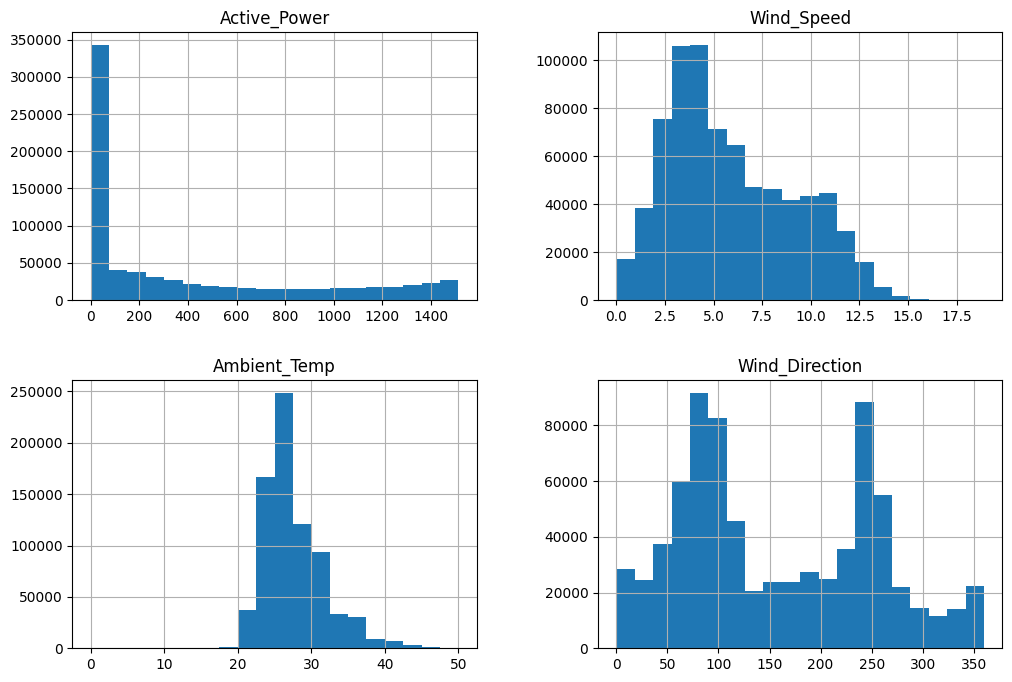

In [116]:
df_train[num_col].hist(bins=20,figsize=(12,8))

NameError: name 'plt' is not defined

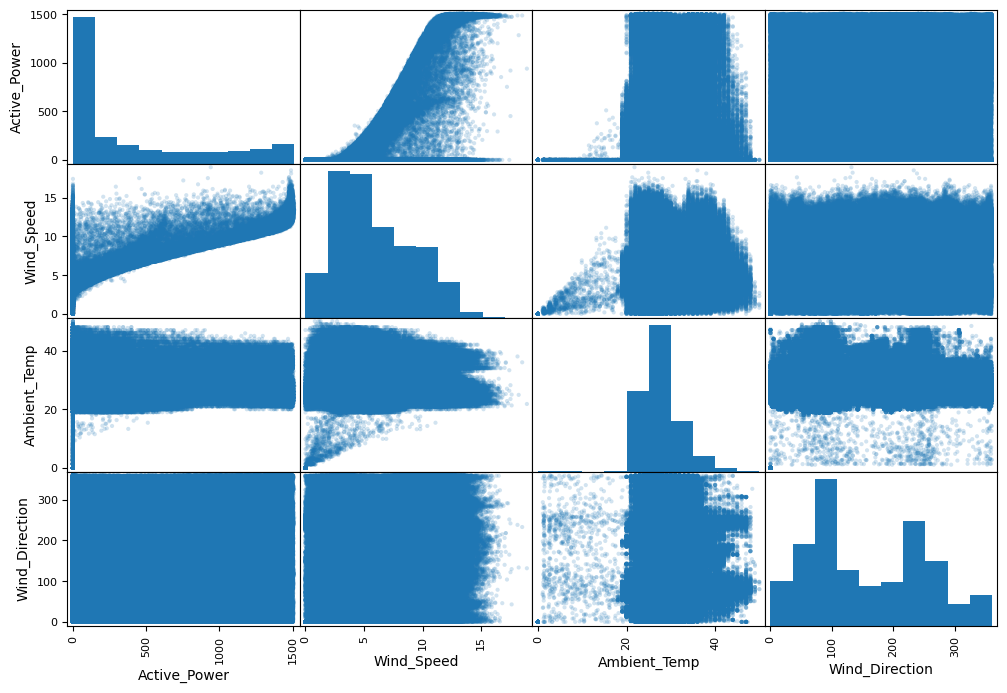

In [117]:
pd.plotting.scatter_matrix(df[num_col], alpha=0.2, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [118]:
for col in num_col:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.distplot(df_train[col], ax=ax[0] ,color='green')  
    sns.boxplot(x=df_train[col], ax=ax[1])
    plt.show()

NameError: name 'plt' is not defined